# Compare CDK2 Inhibitors Point Clouds

In [1]:
%load_ext autoreload
%autoreload 2

### Libraries

In [2]:
import sys
sys.path.append("..")

In [3]:
import open3d as o3d
import numpy as np
import seaborn as sns
import pandas as pd

import re, os
from io import StringIO

from tqdm.auto import trange

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools

import ipywidgets as widgets

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


INFO - 2021-08-19 21:33:39,662 - __init__ - Enabling RDKit 2021.03.3 jupyter extensions


In [4]:
from utils import show_molecule_idx
from utils import AlignShow

## CDK2 Inhibitors

In [5]:
path = "ligands/CDK2"
files = [os.path.join(path, f) for f in os.listdir(path) if os.path.splitext(f)[-1] == ".pcd" and os.path.splitext(f)[0][-4:] == "tran"]

# Order ligands
# This should make the three chemical series pop-up in the PCD fit
names = {
    "4ek4_B_1CK": "CS1",
    "4ek5_B_03K": "CS3",
    "4fkg_B_4CK": "CS4",
    "4fki_B_09K": "CS9",
    "4fkj_B_11K": "CS11",
    "3sw4_B_18K": "CS18",
    "3sw7_B_19K": "CS19",
    "4fko_B_20K": "CS20",
    "4fkp_B_LS5": "CS241",
    "4fkq_B_42K": "CS242",
    "4fkr_B_45K": "CS245",
    "4fks_B_46K": "CS246",
    "4fkt_B_48K": "CS248",
    "4fku_D_60K": "CS260",
    "4fkv_B_61K": "CS261",
    "4fkw_B_62K": "CS262",
}

files.sort(key=lambda f: int(names[os.path.splitext(os.path.basename(f))[0].replace("_tran", "")].replace("CS", "")))

print(files)


pcds = []
mols = []
for f in files:
    pcd = o3d.io.read_point_cloud(f)
    pcds.append(pcd)

    s = Chem.SDMolSupplier(f.replace(".pcd", ".sdf"))
    mol = next(s)
    mols.append(mol)

['ligands/CDK2/4ek4_B_1CK_tran.pcd', 'ligands/CDK2/4ek5_B_03K_tran.pcd', 'ligands/CDK2/4fkg_B_4CK_tran.pcd', 'ligands/CDK2/4fki_B_09K_tran.pcd', 'ligands/CDK2/4fkj_B_11K_tran.pcd', 'ligands/CDK2/3sw4_B_18K_tran.pcd', 'ligands/CDK2/3sw7_B_19K_tran.pcd', 'ligands/CDK2/4fko_B_20K_tran.pcd', 'ligands/CDK2/4fkp_B_LS5_tran.pcd', 'ligands/CDK2/4fkq_B_42K_tran.pcd', 'ligands/CDK2/4fkr_B_45K_tran.pcd', 'ligands/CDK2/4fks_B_46K_tran.pcd', 'ligands/CDK2/4fkt_B_48K_tran.pcd', 'ligands/CDK2/4fku_D_60K_tran.pcd', 'ligands/CDK2/4fkv_B_61K_tran.pcd', 'ligands/CDK2/4fkw_B_62K_tran.pcd']


In [6]:
_ = widgets.interact(lambda index: show_molecule_idx(index, mols), index=widgets.IntSlider(min=0, max=len(mols)-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='index', max=15), Output()), _dom_classes=('widget-intera…

In [7]:
# Score is not symmetric because RANSAC is currently not deterministic
# See https://github.com/intel-isl/Open3D/issues/1263
# Would the score be symmetric if this was not the case?
n = len(pcds)
Sfitness = np.zeros((n,n))

als = AlignShow(mols, pcds)

for i in trange(n):
    for j in trange(n, leave=False):
        # This fills the cache, making what follows faster (alignments are not re-computed)
        Sfitness[i, j] = als.align(i,j)

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

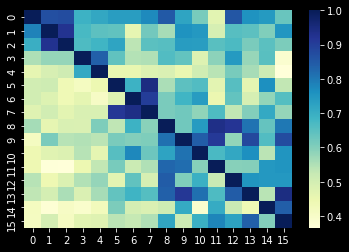

In [8]:
ax = sns.heatmap(Sfitness, cmap="YlGnBu")

In [9]:
als.show(0, 1)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [10]:
als.show(0, 2)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [11]:
als.show(6, 7)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [12]:
als.show(8, 11)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

,,,,,,,,,,,,,,,,
,1.000000,0.870438,0.874088,0.691606,0.713504,0.737226,0.735401,0.773723,0.850365,0.720803,0.611314,0.468978,0.854015,0.759124,0.744526,0.631387
,0.784566,1.000000,0.924437,0.673633,0.646302,0.643087,0.461415,0.618971,0.559486,0.758842,0.745981,0.493569,0.654341,0.646302,0.602894,0.750804
,0.698873,0.925926,1.000000,0.666667,0.684380,0.721417,0.534622,0.648953,0.653784,0.739130,0.735910,0.652174,0.668277,0.608696,0.648953,0.607085
,0.552217,0.579399,0.579399,1.000000,0.838340,0.640916,0.545064,0.549356,0.660944,0.639485,0.477825,0.590844,0.742489,0.576538,0.652361,0.386266
,0.460635,0.491187,0.508813,0.710928,1.000000,0.454759,0.453584,0.478261,0.485311,0.450059,0.505288,0.540541,0.611046,0.559342,0.513514,0.367803
,0.502326,0.511628,0.436047,0.413953,0.444186,1.000000,0.691860,0.945349,0.555814,0.646512,0.662791,0.466279,0.654651,0.462791,0.762791,0.531395
,0.502634,0.478398,0.436249,0.463646,0.405690,0.477345,1.000000,0.903056,0.610116,0.684932,0.737619,0.447840,0.639621,0.492097,0.582719,0.656481
,0.474916,0.502787,0.465998,0.489409,0.489409,0.914158,0.939799,1.000000,0.609810,0.622074,0.585284,0.665552,0.530658,0.598662,0.710145,0.580825
,0.563805,0.461717,0.488399,0.486079,0.604408,0.532483,0.691415,0.592807,1.000000,0.621810,0.741299,0.937355,0.918794,0.808585,0.638051,0.799304
,0.413349,0.610070,0.542155,0.548009,0.538642,0.610070,0.600703,0.605386,0.812646,1.000000,0.841920,0.909836,0.581967,0.882904,0.662763,0.875878

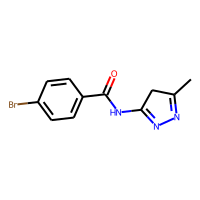
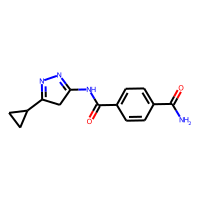
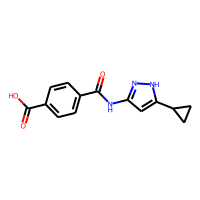
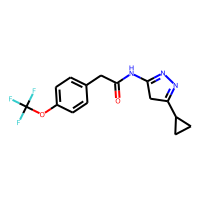
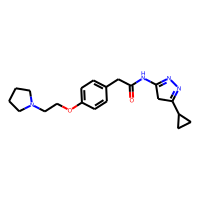
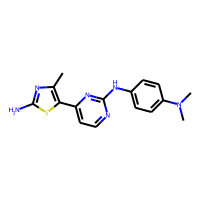
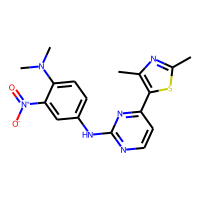
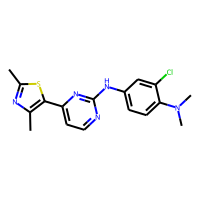
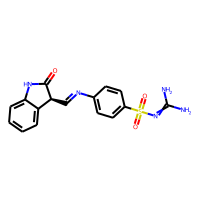
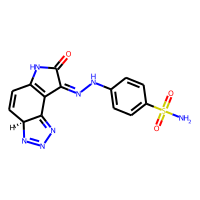
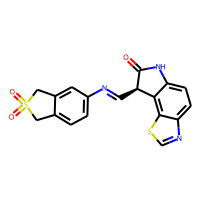
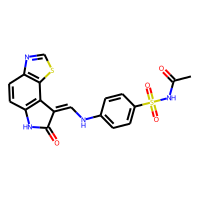
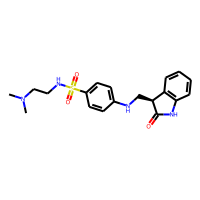
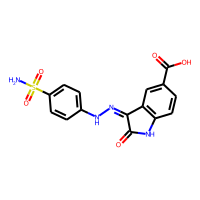
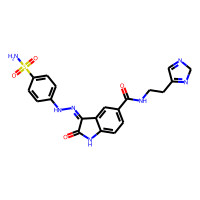
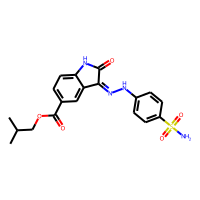
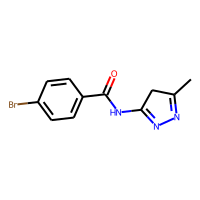
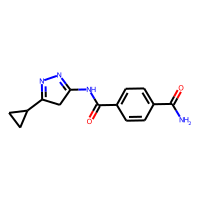
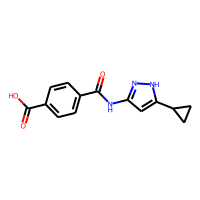
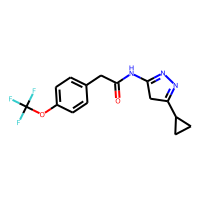
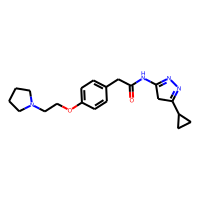
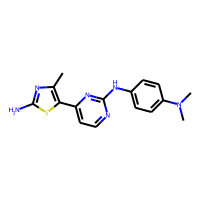
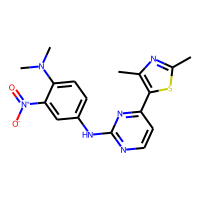
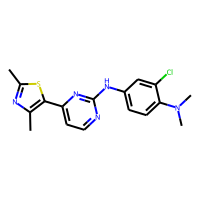
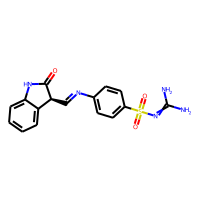
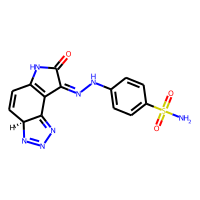
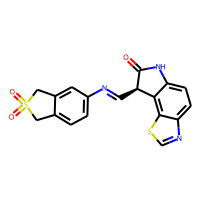
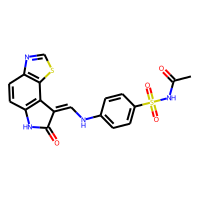
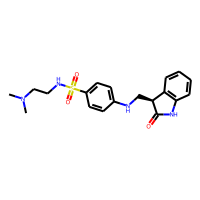
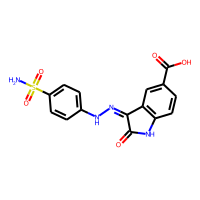
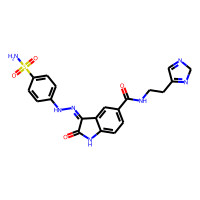
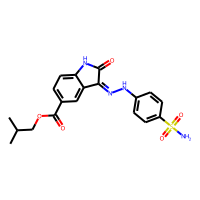

In [13]:
# Molecuiles in 2D for visualization
from copy import deepcopy

mols2d = [deepcopy(mol) for mol in mols]

for mol in mols2d:
    AllChem.Compute2DCoords(mol)

df =pd.DataFrame(Sfitness, columns=mols2d, index=mols2d)
PandasTools.ChangeMoleculeRendering(df, renderer="SVG")
df.style.background_gradient(cmap=sns.cm.rocket_r)

In [14]:
_ = widgets.interact(als.show, idx1=(0, len(mols) - 1), idx2=(0, len(mols) - 1))

interactive(children=(IntSlider(value=7, description='idx1', max=15), IntSlider(value=7, description='idx2', m…